<a href="https://colab.research.google.com/github/KhoaLearn/Vinamilk-Joint-Stock-company-Investigating-Value-at-Risk-with-Historical-method-and-AR-1--Garch-1-1/blob/main/Project_FRM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8, 5]
import numpy as np
from scipy.stats.distributions import norm
import statsmodels.api as sm
import pylab
from scipy.stats import jarque_bera, skew, kurtosis
from statsmodels.graphics.tsaplots import plot_acf

## 1. Statistical Analysis

In [38]:
# Import Data
url = 'https://raw.githubusercontent.com/QuanNguyenIU/Fin-Risk-2/main/price.csv'
df = pd.read_csv(url)
df = df[df['symbol'] == 'VNM'][['date', 'adjusted']]
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.head()


,date,adjusted
2500,2021-12-31,84.98
2501,2021-12-30,83.90
2502,2021-12-29,83.80
2503,2021-12-28,84.10
2504,2021-12-27,84.69


In [39]:
df.dtypes

date        datetime64[ns]
adjusted           float64
dtype: object

Text(0.5, 0, '')

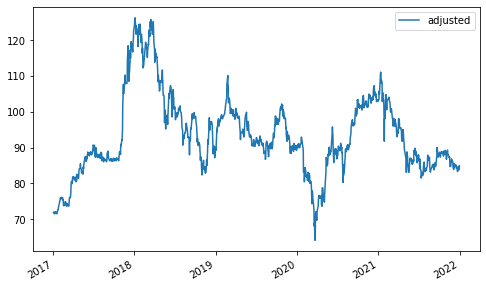

In [40]:
# Price Chart
df.plot.line(x = 'date', y = 'adjusted')
plt.xlabel('')

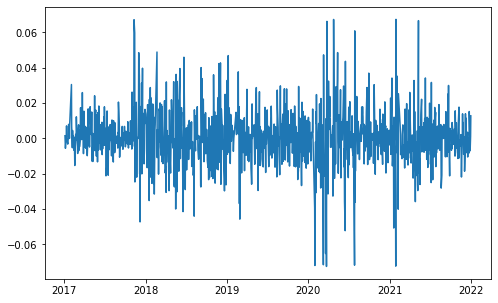

In [41]:
# Return Chart
price = list(df['adjusted'])
returns = np.log(price[:-1]) - np.log(price[1:])
days = list(df['date'])
fig, ax = plt.subplots()
ax.plot(days[:-1], returns)
plt.show()

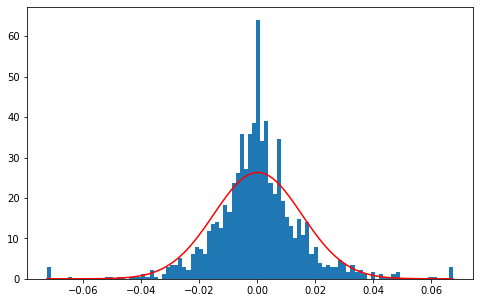

In [42]:
mean, var = norm.fit(returns)
x = np.linspace(min(returns), max(returns), 100)
y = norm.pdf(x, mean, var)
plt.hist(returns, bins = x.flatten(), density = True)
plt.plot(x, y, 'r-')
plt.show()

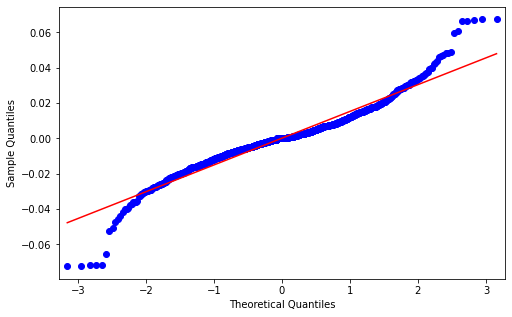

In [43]:
sm.qqplot(returns, line = 's')
pylab.show()

In [44]:
print('Skewness:', skew(returns))
print('Excess Kurtosis:', kurtosis(returns))

Skewness: 0.03962293009354694
Excess Kurtosis: 4.090020774842138


In [45]:
jarque_bera(returns)

(870.8938648500565, 0.0)

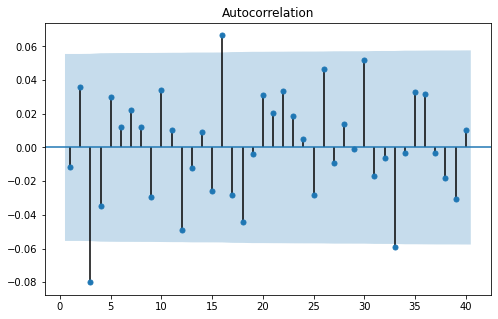

In [46]:
plot_acf(returns, lags = 40, alpha = 0.05, use_vlines = True, zero = False)
plt.show()

## 2. Historical Simulation for VaR

In [47]:
def hist_sim_VaR(data, alpha, window):
  VaR = []
  for i in range(0, len(data) - window - 1):
    y = data[i:i + window]
    ys = sorted(y)
    ysta = ys[round(alpha * window)]
    VaR.append(ysta) #* price[i]
  return VaR

def plot_VaR(data, alpha, window):
  VaR = hist_sim_VaR(data, alpha, window)
  fig, ax = plt.subplots()
  ax.plot(days[:-1], returns, 'b')
  ax.plot(days[:len(VaR)], VaR, 'r')
  plt.legend(['Return', 'Estimated VaR'])

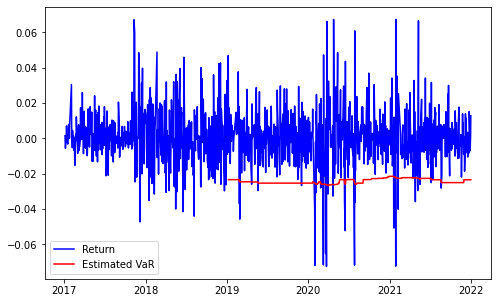

In [48]:
plot_VaR(returns, 0.05, 500)
plt.savefig('historical_VaR_500.png')

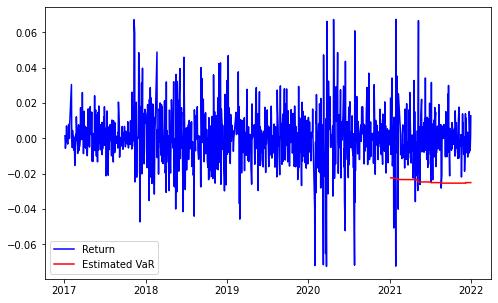

In [49]:
plot_VaR(returns, 0.05, 1000)
plt.savefig('historical_VaR_1000.png')

## 3. AR-GARCH model